# EXPLORATORY DATA ANALYSIS OF EMPLOYEE DATASET

### AIMS & OBJECTIVES OF THIS PROJECT

### Highest earning employees in each department
### Lowest earning employees in each department
### Attrition by department
### Number of male/female employee in each department
### How many employees work overtime in each department
### Marital status of employees in each department

## IMPORTING MY DATASET

In [16]:
import pandas as pd
data=pd.read_csv('EmployeeData.csv')
# checking the size of my dataset
data.shape

(1470, 35)

## Checking the first five rows

In [26]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### checking for missing values

In [27]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

 ### There are no missing values

### Counting the number of employees per department

In [16]:
data["EmployeeCount"].groupby(data['Department']).agg('count')

Department
Human Resources            63
Research & Development    961
Sales                     446
Name: EmployeeCount, dtype: int64

### There are 63 employeees in Human Resources dept, 961 employees in Research & Dev and 446 employees in Sales dept

### visualizing department by number of employees

<AxesSubplot:xlabel='Department'>

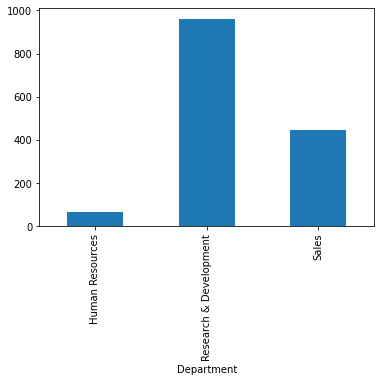

In [54]:
data['EmployeeCount'].groupby(data['Department']).agg('count').plot(kind='bar')

<AxesSubplot:ylabel='EmployeeCount'>

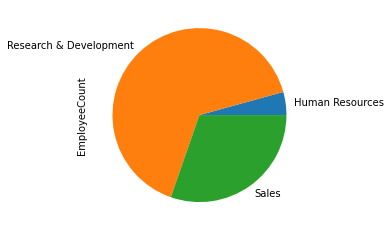

In [55]:
data['EmployeeCount'].groupby(data['Department']).agg('count').plot(kind='pie')

## Highest paid employees per department

In [18]:
data.loc[data.groupby(data['Department'])['MonthlyIncome'].idxmax()][['EmployeeNumber','Department','MonthlyIncome']]

,EmployeeNumber,Department,MonthlyIncome
956,1338,Human Resources,19717
190,259,Research & Development,19999
918,1282,Sales,19847


## Lowest paid employees per department

In [20]:
data.loc[data.groupby(data['Department'])['MonthlyIncome'].idxmin()][['EmployeeNumber','Department','MonthlyIncome']]

,EmployeeNumber,Department,MonthlyIncome
1222,1714,Human Resources,1555
513,701,Research & Development,1009
764,1056,Sales,1052


### Comparing the Highest to lowest income

In [24]:
data.pivot_table(values='MonthlyIncome',index='Department', aggfunc=['min','max'])

,min,max
,MonthlyIncome,MonthlyIncome
Department,,
Human Resources,1555,19717
Research & Development,1009,19999
Sales,1052,19847


<AxesSubplot:xlabel='Department'>

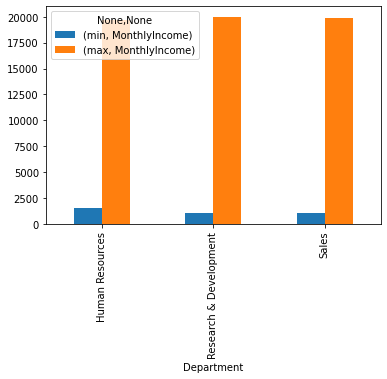

In [58]:
data.pivot_table(values='MonthlyIncome',index='Department', aggfunc=['min','max']).plot(kind='bar')

### visualizing attrition by department

In [4]:
data['Attrition'].groupby(data['Department']).agg('count')

Department
Human Resources            63
Research & Development    961
Sales                     446
Name: Attrition, dtype: int64

In [29]:
pd.crosstab(data['Attrition'],data['Department'])

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


<AxesSubplot:xlabel='Attrition'>

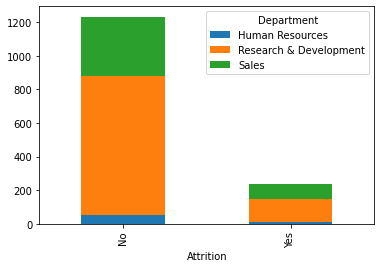

In [34]:
pd.crosstab(data['Attrition'],data['Department']).plot(kind='bar', stacked='True')

## Number of male/female in each department

In [6]:
data['Gender'].groupby(data['Department']).agg('count')

Department
Human Resources            63
Research & Development    961
Sales                     446
Name: Gender, dtype: int64

In [7]:
pd.crosstab(data['Gender'],data['Department'])

Department,Human Resources,Research & Development,Sales
Gender,,,
Female,20,379,189
Male,43,582,257


<AxesSubplot:xlabel='Gender'>

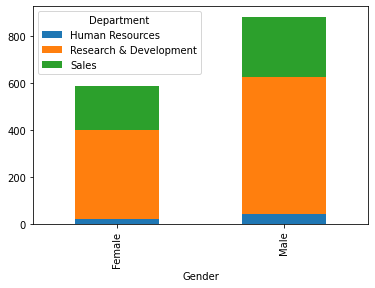

In [8]:
pd.crosstab(data['Gender'],data['Department']).plot(kind='bar', stacked='True')

### EMPLOYEES THAT WORK OVERTIME

In [9]:
pd.crosstab(data['OverTime'],data['Department'])

Department,Human Resources,Research & Development,Sales
OverTime,,,
No,46,690,318
Yes,17,271,128


<AxesSubplot:xlabel='OverTime'>

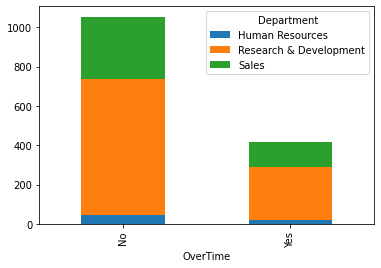

In [10]:
pd.crosstab(data['OverTime'],data['Department']).plot(kind='bar', stacked='True')

In [14]:
pd.crosstab(data['MaritalStatus'],data['Department'])

Department,Human Resources,Research & Development,Sales
MaritalStatus,,,
Divorced,16,224,87
Married,34,433,206
Single,13,304,153


<AxesSubplot:xlabel='MaritalStatus'>

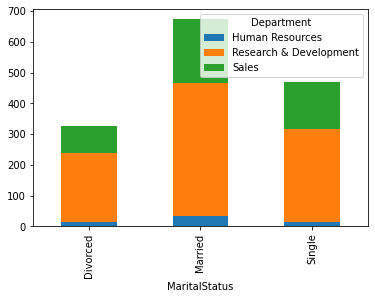

In [11]:
pd.crosstab(data['MaritalStatus'],data['Department']).plot(kind='bar', stacked='True')